In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
plt.style.use(['fivethirtyeight'])
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [47]:
cf.go_offline()

In [48]:
data = pd.read_csv('/Users/adityakaushal/Desktop/Machine Learning practice/DS_ML_Bootcamp/15-Decision-Trees-and-Random-Forests/loan_data.csv')

In [49]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [51]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [53]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


Text(0, 0.5, 'Number of People')

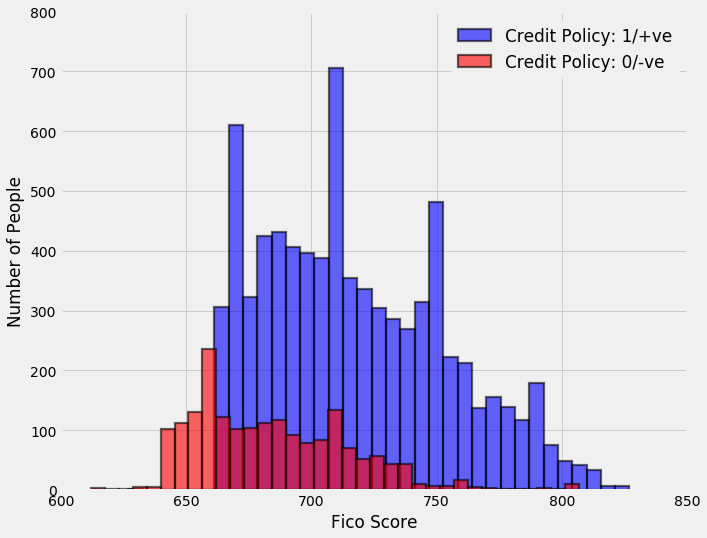

In [87]:
plt.figure(figsize = (10,8))
data[data['credit.policy'] == 1 ]['fico'].hist(bins = 35, color = 'blue', label = 'Credit Policy: 1/+ve', alpha= 0.6, edgecolor = 'black', linewidth = 2.2)
data[data['credit.policy'] == 0]['fico'].hist(bins = 35, color = 'red', label = 'Credit Policy: 0/-ve', alpha = 0.6, edgecolor = 'black', linewidth = 2.2)
plt.legend()
plt.xlabel('Fico Score')
plt.ylabel('Number of People')

Text(0, 0.5, 'Number of People')

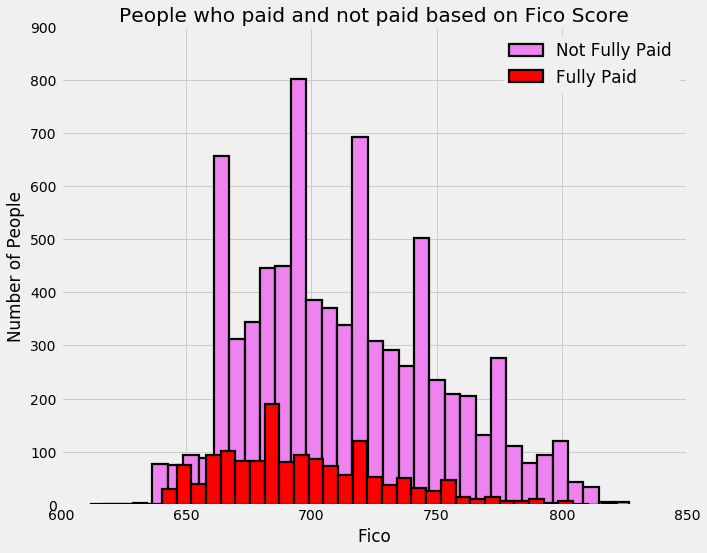

In [115]:
plt.figure(figsize = (10,8))
data[data['not.fully.paid']==0]['fico'].hist(bins = 35, label = 'Not Fully Paid', color = 'violet', edgecolor = 'black', linewidth = 2.2)
data[data['not.fully.paid']==1]['fico'].hist(bins = 35, label = 'Fully Paid', color = 'red', edgecolor = 'black', linewidth = 2.2)
plt.legend()
plt.title('People who paid and not paid based on Fico Score')
plt.xlabel('Fico')
plt.ylabel('Number of People')


In [116]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

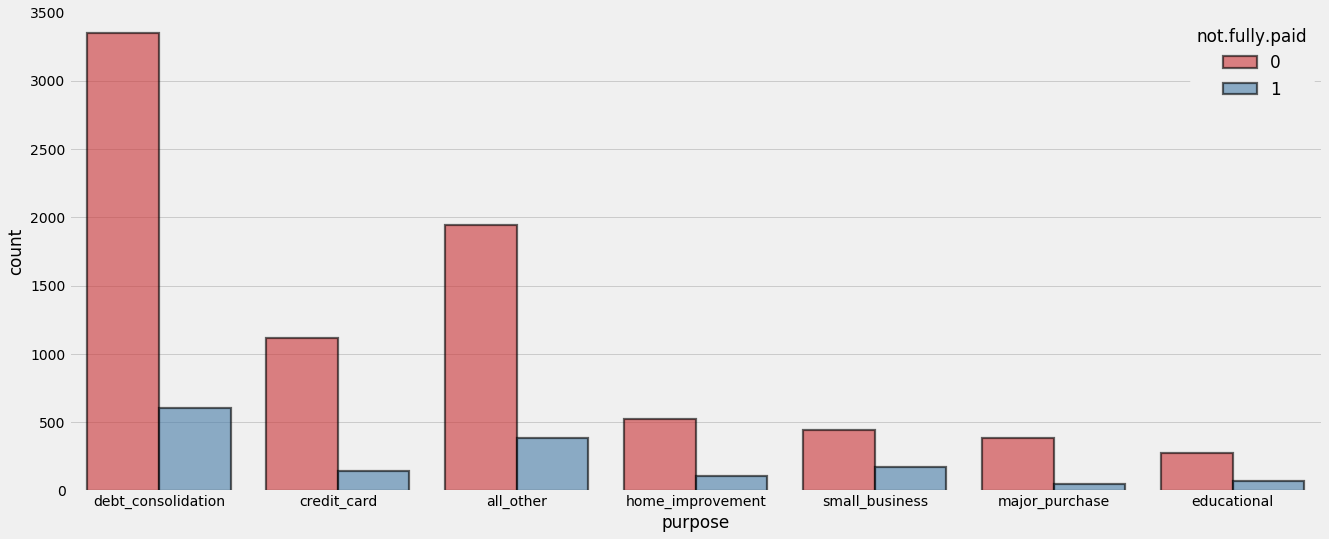

In [141]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = data, linewidth = 2.2, alpha = 0.6, edgecolor = 'black', palette='Set1')


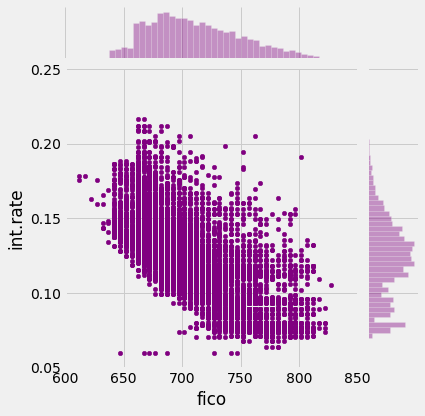

In [153]:
ax = sns.jointplot(x = 'fico', y = 'int.rate', data = data, color = 'purple')
ax.figsize=(10,8)

<Figure size 1440x576 with 0 Axes>

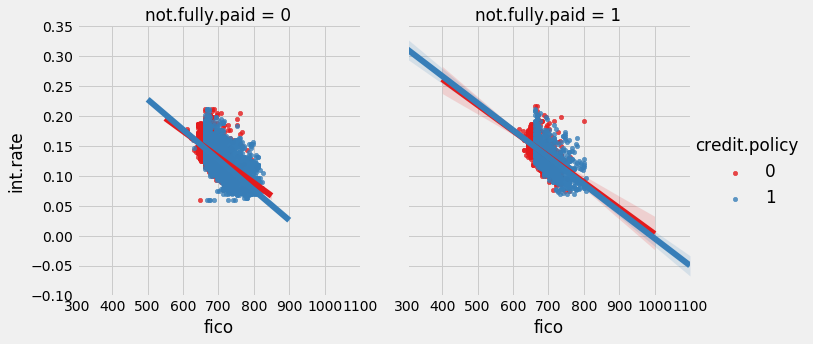

In [162]:
plt.figure(figsize=(20,8))
sns.lmplot(y = 'int.rate', x = 'fico', data = data, hue = 'credit.policy', col = 'not.fully.paid', palette = 'Set1')

In [163]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [164]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [165]:
final_data = pd.get_dummies(data, columns = ['purpose'], drop_first = True)

In [166]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X = final_data.drop(['not.fully.paid'], axis = 1)

In [169]:
y = final_data['not.fully.paid']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [173]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6704, 18) (6704,)
(2874, 18) (2874,)


In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
dtree = DecisionTreeClassifier()

In [176]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [178]:
predictions = dtree.predict(X_test)

In [184]:
from sklearn.metrics import classification_report, confusion_matrix

In [185]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [186]:
print(confusion_matrix(y_test, predictions))

[[2003  428]
 [ 340  103]]


In [187]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
randomForest = RandomForestClassifier(n_estimators = 300)

In [190]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [191]:
pred = randomForest.predict(X_test)

In [192]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [194]:
print(classification_report(y_test, pred))

precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [195]:
confusion_matrix(y_test, pred)

array([[2422,    9],
       [ 433,   10]])